In [1]:
import pandas as pd
import numpy as np
import datetime
import pytz

In [2]:
dfp = pd.read_csv("../president_primary_polls.csv")
dfc = pd.read_csv("coverage.csv").drop(columns = ["Unnamed: 0"])

/home/octav/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dfp["create_date"] = pd.to_datetime(dfp["created_at"], infer_datetime_format = True)
dfp["create_week"] = (dfp['create_date'] - pd.to_timedelta(dfp['create_date'].dt.dayofweek, unit='d') - np.timedelta64(1, 'D')).dt.normalize()
dfp_subset = dfp[dfp["party"] == "DEM"]

In [4]:
dfp_pivot = dfp[dfp["party"] == "DEM"].pivot_table(values = "pct", index = "create_week", columns="answer",
                                                aggfunc = np.mean).fillna(0).iloc[-7:]

In [5]:
dfp[["created_at", "create_date", "create_week"]]

,created_at,create_date,create_week
0,2/24/20 15:14,2020-02-24 15:14:00,2020-02-23
1,2/24/20 15:14,2020-02-24 15:14:00,2020-02-23
2,2/24/20 15:14,2020-02-24 15:14:00,2020-02-23
3,2/24/20 15:14,2020-02-24 15:14:00,2020-02-23
4,2/24/20 15:14,2020-02-24 15:14:00,2020-02-23
...,...,...,...
17326,12/27/18 03:50,2018-12-27 03:50:00,2018-12-23
17327,12/27/18 03:50,2018-12-27 03:50:00,2018-12-23
17328,12/27/18 03:50,2018-12-27 03:50:00,2018-12-23
17329,12/27/18 03:50,2018-12-27 03:50:00,2018-12-23


In [8]:
candidates = dfp_subset["answer"].unique()
can_selected = []
for can in candidates:
    if (dfp_pivot[can] == 0).mean() < 0.5 and dfp_pivot[can].mean() > 0.1:
        print (can)
        can_selected.append(can)

Biden
Buttigieg
Gabbard
Klobuchar
Sanders
Steyer
Warren
Bloomberg
Bennet
Patrick
Yang
Booker
Delaney


In [9]:
dfp["answer"].isin(can_selected)

0         True
1         True
2         True
3         True
4         True
         ...  
17326     True
17327     True
17328    False
17329     True
17330    False
Name: answer, Length: 17331, dtype: bool

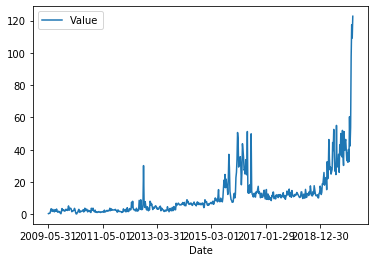

In [13]:
dfc.groupby(by = ["Date"]).sum().plot()

In [14]:
dfc_pivot = dfc.pivot_table(values = "Value", index = "Date", columns="Candidate",
                                                aggfunc = np.sum).fillna(0).iloc[-7:]

In [15]:
start_date = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2020-02-15", "%Y-%m-%d")

In [16]:
dfp_pivot.index > start_date

array([ True,  True,  True,  True,  True,  True,  True])

In [17]:
dfp["create_date"]

0       2020-02-24 15:14:00
1       2020-02-24 15:14:00
2       2020-02-24 15:14:00
3       2020-02-24 15:14:00
4       2020-02-24 15:14:00
                ...        
17326   2018-12-27 03:50:00
17327   2018-12-27 03:50:00
17328   2018-12-27 03:50:00
17329   2018-12-27 03:50:00
17330   2018-12-27 03:50:00
Name: create_date, Length: 17331, dtype: datetime64[ns]

In [31]:
dfp["create_week"].dt.strftime("%Y-%m-%d")

'2020-02-23'

In [18]:
start_date = dfp["create_week"].min()
end_date = dfp["create_week"].max()

datetime.datetime(2020, 1, 1, 0, 0)

In [21]:
dfc["Date"] = pd.to_datetime(dfc["Date"])

In [23]:
df_agg = dfc[dfc["Date"] > start_date].groupby("Candidate").mean()
df_agg["answer"] = dfp[dfp["create_week"] > "2020-01-01"].groupby("answer")["pct"].mean().loc[can_selected]
df_agg

,Value,answer
Candidate,,
Bennet,0.025131,0.515672
Biden,1.845782,22.473614
Bloomberg,2.113221,11.590240
Booker,0.044011,1.622857
Buttigieg,0.769329,12.374198
Delaney,0.010522,0.363291
Gabbard,0.031721,2.173668
Klobuchar,0.420869,6.917425
Patrick,0.069642,0.350000


In [27]:
dfc[dfc["Date"] > "2020-01-01"].groupby(["Candidate", "Date"]).sum()

Value
Candidate Date              
Bennet    2020-01-05  0.1482
          2020-01-12  0.4929
          2020-01-19  0.1922
          2020-01-26  0.0860
          2020-02-02  0.3230
...                      ...
Yang      2020-01-26  0.6558
          2020-02-02  1.6206
          2020-02-09  1.4793
          2020-02-16  0.2789
          2020-02-23  0.2731

[104 rows x 1 columns]

In [29]:
dfc["Date"]

0       2009-05-31
1       2009-06-07
2       2009-06-14
3       2009-06-21
4       2009-06-28
           ...    
65632   2020-01-26
65633   2020-02-02
65634   2020-02-09
65635   2020-02-16
65636   2020-02-23
Name: Date, Length: 65637, dtype: datetime64[ns]

In [108]:
dfp[dfp["create_week"] > "2020-01-01"].groupby(["answer", "create_week"])[["pct"]].mean()

pct
answer create_week          
Bennet 2020-01-05   0.500000
       2020-01-12   0.525000
       2020-01-19   0.550000
       2020-01-26   0.572727
       2020-02-02   0.406897
...                      ...
Yang   2020-01-19   3.964706
       2020-01-26   3.782250
       2020-02-02   3.305556
       2020-02-09   3.578947
       2020-02-16   1.666667

[143 rows x 1 columns]

In [110]:
dfp["create_week"][1]

Timestamp('2020-02-23 00:00:00')